In [1]:
from scipy.fftpack import dct, idct

In [2]:
# size in byte: 128/64/32 (32/16/8 values)
def compress_to_size(x, size):
    size = int(size/4)
    com_x = dct(x, n = size, norm = 'ortho')
    return com_x
# size from 128/64/32 bytes to 1024 bytes
def decompress1024(x, size):
    rec_x = idct(x, n = 256, norm = 'ortho')
    return rec_x

In [3]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10]

In [5]:
import numpy as np
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

In [6]:
i = 1
t = range(256)
x = time_series_seismic_query[i,]
x1 = compress_to_size(x, 128)
y1 = decompress1024(x1, 256)

16.884052778935175

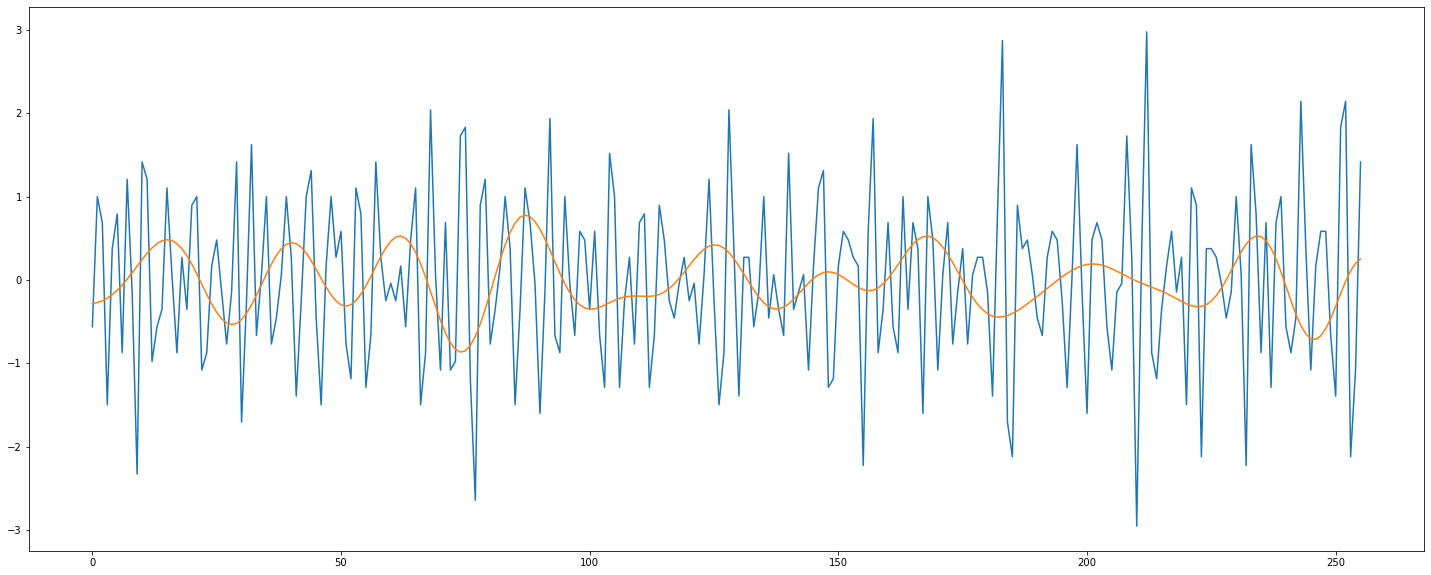

In [7]:
plt.plot(t,x,t,y1)
euc_dist(x,y1)

## Speed test 1024 bytes (256 floats) -> 128 bytes (32 floats)

In [8]:
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

import time
start_time = time.time()

for i in range(50000):
# t = range(256)
    x = time_series_synthetic[i,]
    x1 = compress_to_size(x, 128)
    y1 = decompress1024(x1, 256)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.0580129623413086 seconds ---
